In [1]:
import pandas as pd; 
import os; 
import re; 

from matplotlib import pyplot as plt; 



In [44]:
files2 = pd.read_csv("clinical_short2.csv" , sep = '\t')


In [47]:
eda_clinical_short = pd.read_csv("clinical_short2.csv" , sep = '\t')
eda_clinical_short.head()

,Unnamed: 0,patient,year_of_birth,gender,race,definition,tumor_stage,age_at_diagnosis,vital_status,months_to_death,months_to_last_follow_up
0,0,TCGA-EE-A2MG,1974.0,male,white,Metastatic,stage i,23.03,dead,261.58,NaN
1,1,TCGA-EE-A3JD,1939.0,male,white,Metastatic,stage iii,71.04,dead,69.33,NaN
2,2,TCGA-D3-A5GL,1929.0,male,white,Metastatic,stage ib,74.23,alive,NaN,318.83
3,3,TCGA-EE-A2MU,1934.0,male,white,Metastatic,stage ia,71.88,alive,NaN,135.00
4,4,TCGA-D3-A3CF,1948.0,female,white,Metastatic,stage iiic,61.39,dead,62.17,NaN


In [48]:
eda_clinical_short.describe(include = 'all')

,Unnamed: 0,patient,year_of_birth,gender,race,definition,tumor_stage,age_at_diagnosis,vital_status,months_to_death,months_to_last_follow_up
count,471.000000,471,460.000000,471,471,471,471,463.000000,471,222.000000,310.000000
unique,NaN,468,NaN,2,4,3,15,NaN,2,NaN,NaN
top,NaN,TCGA-ER-A2NF,NaN,male,white,Metastatic,stage iiic,NaN,alive,NaN,NaN
freq,NaN,2,NaN,292,448,367,67,NaN,249,NaN,NaN
mean,235.681529,NaN,1947.856522,NaN,NaN,NaN,NaN,58.731123,NaN,148.767342,146.863323
std,136.486865,NaN,14.900288,NaN,NaN,NaN,NaN,15.713088,NaN,157.199799,164.615861
min,0.000000,NaN,1912.000000,NaN,NaN,NaN,NaN,15.570000,NaN,6.580000,-0.250000
25%,117.500000,NaN,1936.000000,NaN,NaN,NaN,NaN,48.350000,NaN,43.190000,35.440000
50%,236.000000,NaN,1948.000000,NaN,NaN,NaN,NaN,58.670000,NaN,90.455000,83.835000
75%,353.500000,NaN,1958.000000,NaN,NaN,NaN,NaN,71.390000,NaN,172.707500,196.955000


In [49]:
gender_studies = eda_clinical_short['gender'].describe(include = "all")

In [50]:
gender_studies

count      471
unique       2
top       male
freq       292
Name: gender, dtype: object

In [51]:
genders = eda_clinical_short.groupby(['gender'])['patient'].count()

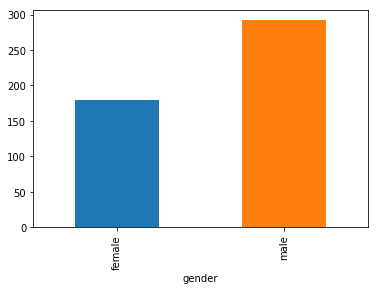

In [92]:
genders.plot(kind = 'bar')

In [57]:
eda_clinical_short['age_at_diagnosis'].describe()

count    463.000000
mean      58.731123
std       15.713088
min       15.570000
25%       48.350000
50%       58.670000
75%       71.390000
max       90.060000
Name: age_at_diagnosis, dtype: float64

In [58]:
#difference in mean age of diagnosis between males and females?
eda_clinical_short.groupby(['gender'])['age_at_diagnosis'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,174.0,59.152241,16.234913,15.57,47.4175,59.59,73.0975,90.06
male,289.0,58.477578,15.413385,18.31,48.7300,58.09,70.8700,90.06


In [62]:
the_big_c = eda_clinical_short['age_at_diagnosis']

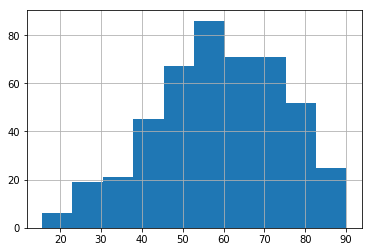

In [87]:
the_big_c.hist()

In [72]:
battle_of_the_sexes = eda_clinical_short.groupby(['gender'])['age_at_diagnosis']


gender        
female  female    AxesSubplot(0.125,0.125;0.775x0.755)
male    male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age_at_diagnosis, dtype: object

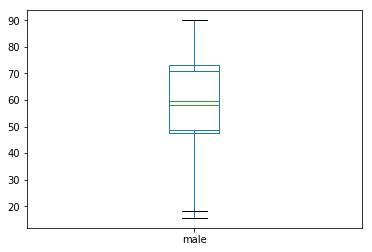

In [79]:
battle_of_the_sexes.plot(kind = 'box' , subplots = True)

gender
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age_at_diagnosis, dtype: object

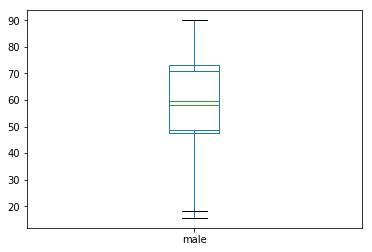

In [83]:
eda_clinical_short.groupby(['gender'])['age_at_diagnosis'].plot.box() #kind = 'box' , subplots = True)

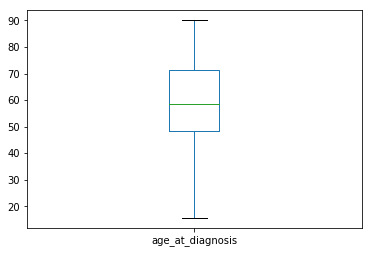

In [86]:
eda_clinical_short[['gender' , 'age_at_diagnosis']].plot(kind = 'box' , by = 'gender')

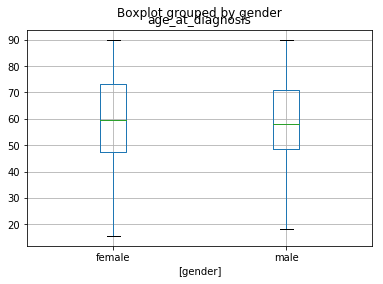

In [84]:
eda_clinical_short[['gender', 'age_at_diagnosis']].boxplot(by='gender')

In [94]:
stage_recode = {'not reported':None, 'stage 0':0, 'i/ii nos':None, 'stage i':1, 'stage ia':1, 'stage ib':1, 'stage ii':2, 'stage iia':2, 'stage iib':2, 'stage iic':2, 'stage iii':3, 'stage iiia':3, 'stage iiib':3, 'stage iiic':3, 'stage iv':4, 'stage x':None, '':None, '0':None}
eda_clinical_short['tumor_stage_2'] = [stage_recode[t] for t in eda_clinical_short['tumor_stage'].fillna('')]

In [95]:
eda_clinical_short

,Unnamed: 0,patient,year_of_birth,gender,race,definition,tumor_stage,age_at_diagnosis,vital_status,months_to_death,months_to_last_follow_up,tumor_stage_2
0,0,TCGA-EE-A2MG,1974.0,male,white,Metastatic,stage i,23.03,dead,261.58,NaN,1.0
1,1,TCGA-EE-A3JD,1939.0,male,white,Metastatic,stage iii,71.04,dead,69.33,NaN,3.0
2,2,TCGA-D3-A5GL,1929.0,male,white,Metastatic,stage ib,74.23,alive,NaN,318.83,1.0
3,3,TCGA-EE-A2MU,1934.0,male,white,Metastatic,stage ia,71.88,alive,NaN,135.00,1.0
4,4,TCGA-D3-A3CF,1948.0,female,white,Metastatic,stage iiic,61.39,dead,62.17,NaN,3.0
5,5,TCGA-EE-A2M8,1946.0,female,white,Metastatic,stage iii,54.27,dead,50.08,NaN,3.0
6,6,TCGA-EE-A2GL,1966.0,female,white,Metastatic,stage iia,40.28,alive,NaN,201.92,2.0
7,7,TCGA-GN-A268,1922.0,female,white,Metastatic,stage iib,83.37,dead,159.17,NaN,2.0
8,8,TCGA-EE-A29T,1931.0,female,white,Metastatic,not reported,51.45,alive,NaN,937.67,NaN
9,9,TCGA-FS-A1ZK,1937.0,male,white,Metastatic,stage ii,68.05,dead,60.67,NaN,2.0


In [4]:
import pandas as pd; 
somatic_short = pd.read_csv("somatic_short.csv" , sep = "\t")

In [6]:
somatic_short

,Hugo_Symbol,Entrez_Gene_Id,Center,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Protein_position,Amino_acids
0,CAMTA1,23261,BI,chr1,7663407,7663407,+,Missense_Mutation,SNP,C,C,T,TCGA-ER-A19O-06A-11D-A197-08,287/1673,S/L
1,C8B,732,BI,chr1,56956798,56956798,+,Missense_Mutation,SNP,C,C,T,TCGA-ER-A19O-06A-11D-A197-08,121/591,R/Q
2,ADGRL4,64123,BI,chr1,78921709,78921709,+,Silent,SNP,C,C,T,TCGA-ER-A19O-06A-11D-A197-08,387/690,E
3,ARHGAP29,9411,BI,chr1,94188873,94188873,+,Missense_Mutation,SNP,C,C,T,TCGA-ER-A19O-06A-11D-A197-08,549/1261,E/K
4,LRRC39,127495,BI,chr1,100155171,100155171,+,Missense_Mutation,SNP,C,C,T,TCGA-ER-A19O-06A-11D-A197-08,231/335,R/Q
5,NTNG1,22854,BI,chr1,107148685,107148685,+,Missense_Mutation,SNP,A,A,G,TCGA-ER-A19O-06A-11D-A197-08,31/539,D/G
6,PRPF38B,55119,BI,chr1,108699496,108699496,+,Missense_Mutation,SNP,G,G,A,TCGA-ER-A19O-06A-11D-A197-08,373/546,E/K
7,INSRR,3645,BI,chr1,156846588,156846588,+,Missense_Mutation,SNP,T,T,C,TCGA-ER-A19O-06A-11D-A197-08,581/1297,T/A
8,FCRL5,83416,BI,chr1,157547140,157547140,+,Missense_Mutation,SNP,C,C,T,TCGA-ER-A19O-06A-11D-A197-08,37/977,G/E
9,CD1C,911,BI,chr1,158291226,158291226,+,Missense_Mutation,SNP,G,G,A,TCGA-ER-A19O-06A-11D-A197-08,52/333,E/K


In [17]:
somatic_short.groupby(['Variant_Classification'])['Hugo_Symbol'].count()

Variant_Classification
Frame_Shift_Del        1184
Frame_Shift_Ins         627
In_Frame_Del            257
In_Frame_Ins            148
Missense_Mutation    207402
Nonsense_Mutation     13144
Silent               115738
Name: Hugo_Symbol, dtype: int64